In [12]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import random

from scipy import eye, asarray, dot, sum, diag
from scipy.linalg import svd
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid


import PCA_functions as pf
import Extreme_functions as ef

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp

from Data import Data
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation

import scipy.stats as st

import reverse_geocoder as rg

from pandas_datareader import wb
import scipy.stats as st

import Rung as rung

from pandas_datareader import wb

import seaborn as sns


import seaborn as sns
import feature_finder_keiko as ff
import feature_finder_f as ff1

from scipy import signal

plt.rcParams["figure.figsize"] = (20,10)

In [3]:
def EOF_plot(pc, df_sst, Vr, lat_sst, lon_sst):

    df_sst["pc"] = Vr[:,pc-1]

    #lon1 = np.arange(-178.75,179.0,2.5)
    lon1_sst = np.arange(-180,180,2)
    #lat1 = np.arange(-40,40,2.5)

    deg = np.zeros((len(lat_sst),len(lon1_sst)))

    lat_number = deg.shape[0]
    lon_number = deg.shape[1]

    for i in range(lat_number):
        for j in range(lon_number):
            if not df_sst[(df_sst.lats == lat_sst[i]) & (df_sst.lons == lon1_sst[j])].pc.values.size == 0:
                deg[i,j] = df_sst[(df_sst.lats == lat_sst[i]) & (df_sst.lons == lon1_sst[j])].pc.values
            else:
                deg[i,j]=np.nan


    plt.figure(figsize=(30,15))
    #map = Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
    map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
    #map.fillcontinents(color='grey', alpha=0.5)
    #map.drawcoastlines(linewidth=0.)


    xx, yy = meshgrid(lon1_sst, lat_sst)
    cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
    cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
    cbar.ax.tick_params(labelsize=35)
    #plt.savefig("EOF1.png")
    plt.show()

In [66]:
class_name = "BSh"

tau = 12

In [67]:
link_caus = np.load("../../whole_data_results/link_rotated_ET/best_link_all_1930_2000_{}_{}.npy".format(tau, class_name))
link_corr = np.load("../../whole_data_results/link_rotated_ET/best_link_corr_all_1930_2000_{}_{}.npy".format(tau, class_name))

In [113]:
link_caus = np.load("../../whole_data_results/link_rotated_ET/best_link_all_1930_2000_{}.npy".format(tau))
link_corr = np.load("../../whole_data_results/link_rotated_ET/best_link_all_corr_1930_2000_{}.npy".format(tau))

In [129]:
link_caus[:,0]

array([13, 91, 66, 51, 66, 90, 85, 65, 72, 82,  3, 50, 46, 60, 71])

In [130]:
link_corr[:,0]

array([13, 60, 21, 66, 90, 97,  4, 71, 42, 22, 29, 25, 42, 90, 67, 43])

In [132]:
np.intersect1d(link_corr[:,0], link_caus[:,0])

array([13, 60, 66, 71, 90])

In [116]:
train_start = 1930
validation_end = 2000

n_components_sst = 98

temporal_limits = {"time_min":datetime(train_start, 1, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}
original_count, count = ff.drought_timeseries("../npy_files/ET_gamma_18912015.npy",train_start,validation_end)
data_sst, ts, V, df_sst, avg, std = ff.PCA_computer_rotated('../../../nc/sst.mnmean.nc', "sst",temporal_limits, n_components_sst, -9.96921e+36)

test_start = 2001
test_end = 2015

temporal_limits_test = {"time_min":datetime(test_start, 1, 1, 0, 0),"time_max":datetime(test_end, 12, 1, 0, 0)}
data_sst_test = ff.data_generator_avg_std('../../../nc/sst.mnmean.nc', "sst",temporal_limits_test, avg, std, 12, -9.96921e+36)
original_count_test, count_test = ff.drought_timeseries("../npy_files/ET_gamma_18912015.npy",test_start,test_end)

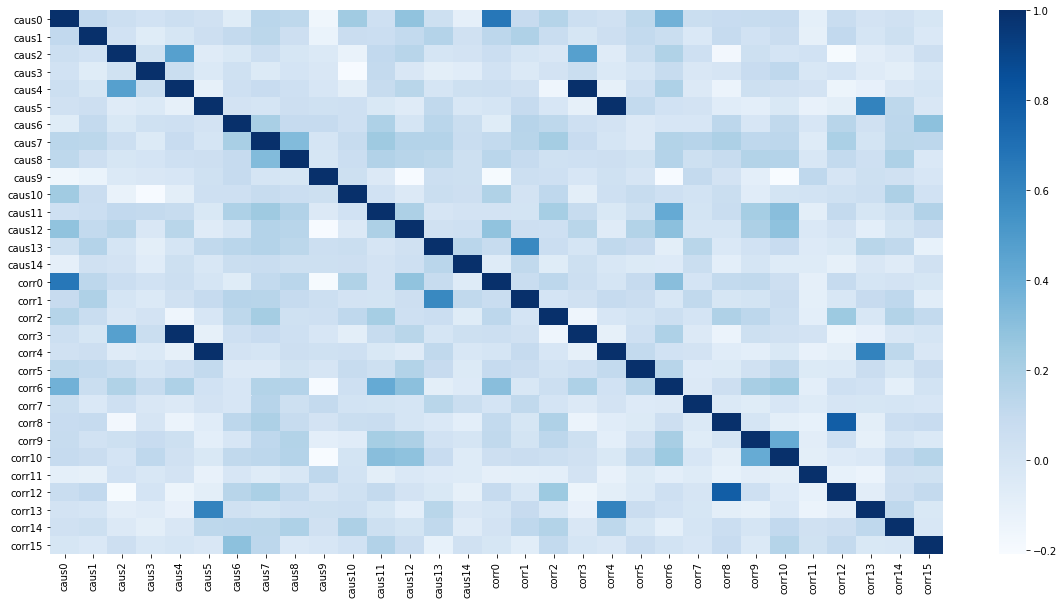

In [117]:
df = pd.DataFrame()

for k in range(len(link_caus)):
    df['caus'+str(k)] = ff.time_series_maker_V(data_sst, V[:,link_caus[k,0]-1])
    df['caus'+str(k)] = df['caus'+str(k)].shift(abs(link_caus[k,1]))
#df = df.dropna()

for k in range(len(link_corr)):
    df['corr'+str(k)] = ff.time_series_maker_V(data_sst, V[:,link_corr[k,0]-1])
    df['corr'+str(k)] = df['corr'+str(k)].shift(abs(link_corr[k,1]))
df = df.dropna()

sns.heatmap(df.corr(),cmap="Blues")

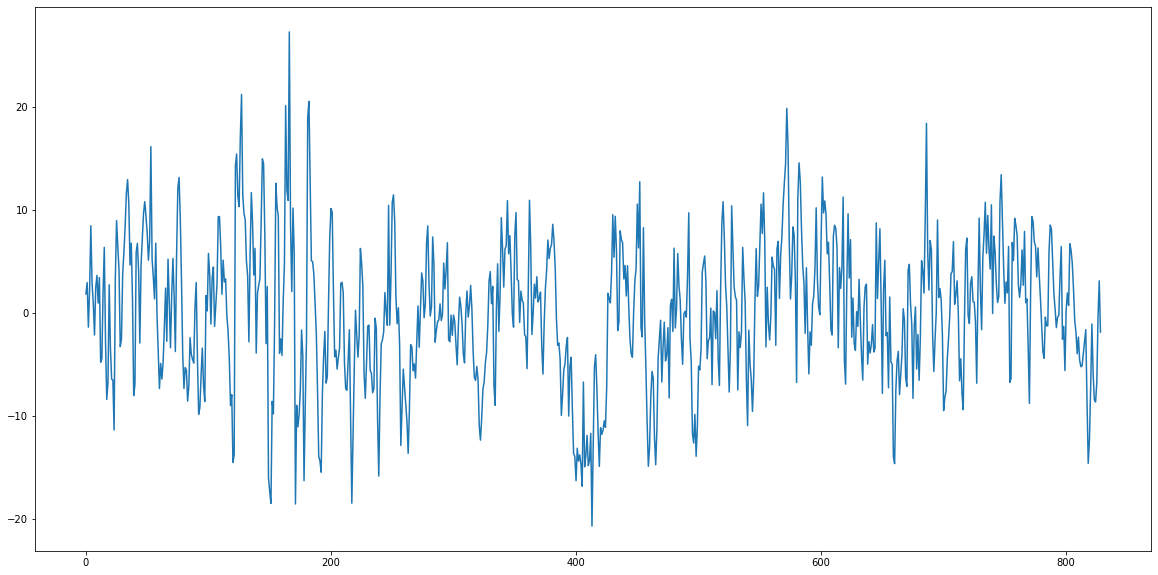

In [118]:
plt.plot(df["caus2"].values)

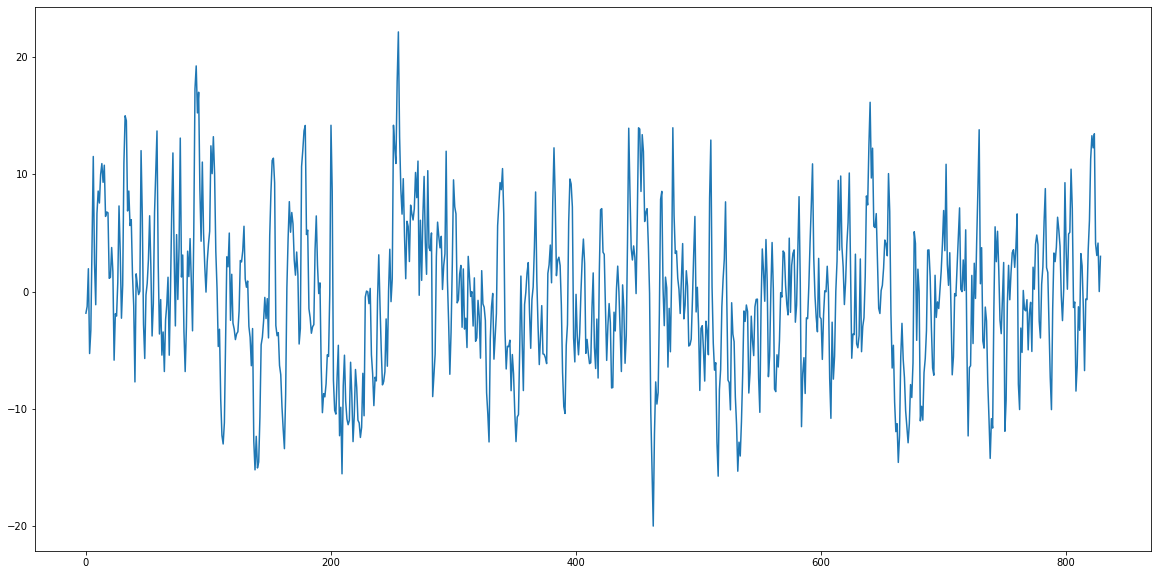

In [119]:
plt.plot(df["corr7"].values)

In [62]:
df_caus = pd.DataFrame()

for k in range(len(link_caus)):
    df_caus['caus'+str(k)] = ff.time_series_maker_V(data_sst, V[:,link_caus[k,0]-1])
    df_caus['caus'+str(k)] = df_caus['caus'+str(k)].shift(abs(link_caus[k,1]))
df_caus = df_caus.dropna()

In [ ]:
df_corr = pd.DataFrame() 
for k in range(len(link_corr)):
    df_corr['corr'+str(k)] = ff.time_series_maker_V(data_sst, V[:,link_corr[k,0]-1])
    df_corr['corr'+str(k)] = df_corr['corr'+str(k)].shift(abs(link_corr[k,1]))
df_corr = df_corr.dropna()

In [120]:
df_caus = df.iloc[:,:len(link_caus)].copy()
df_corr = df.iloc[:,len(link_caus):].copy()

In [121]:
V_caus, U_caus, S_caus, ts_caus, eig_caus, explained_caus, max_comps_caus = rung.pca_svd(df_caus)

In [122]:
V_corr, U_corr, S_corr, ts_corr, eig_corr, explained_corr, max_comps_corr = rung.pca_svd(df_corr)

In [124]:
stats.pearsonr(ts_corr[:,0], ts_caus[:,0])

(0.3370819056356317, 1.7836965144722324e-23)

In [125]:
x = np.arange(len(ts_corr[:,0]))

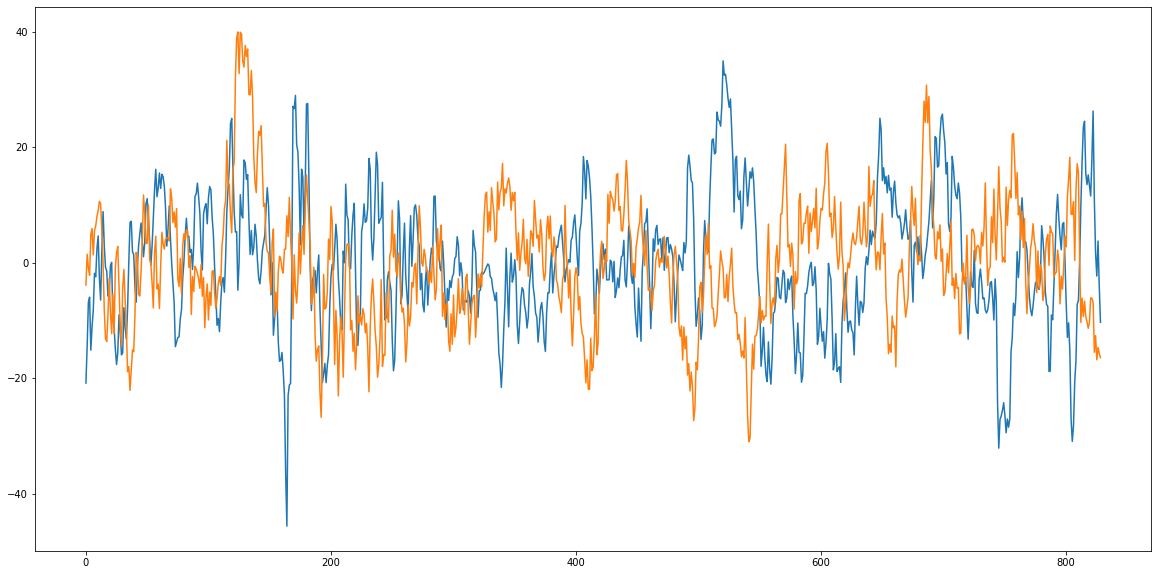

In [126]:
plt.plot(x,ts_corr[:,1],x,ts_caus[:,1])